In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import scipy
from tqdm.notebook import trange, tqdm


In [103]:
def create_weighted_directed_graph_from_adj_matrix(adjacency_matrix):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes to the graph
    num_nodes = adjacency_matrix.shape[0]
    for i in range(num_nodes):
        G.add_node(i)

    # Add edges from adjacency matrix
    for i in range(num_nodes):
        for j in range(num_nodes):
            weight = adjacency_matrix[i, j]
            if weight > 0:  # Add an edge only if weight is greater than 0
                G.add_edge(i, j, weight=weight)

    return G

# Test the function
num_nodes = 50

# Create a num_nodes by num_nodes matrix filled with zeros
adjacency_matrix = np.zeros((num_nodes, num_nodes))

# Fill in the adjacency matrix with random edge weights, No self-connections, only 10% of the edges are connected
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j:  # No self-connections
            if random.randint(1, 10) >= 8:
                weight = random.randint(1, 10)
                adjacency_matrix[i, j] = weight


# for i in range(num_nodes):
#     for j in range(num_nodes):
#         if i != j:  # No self-connections
#             weight = random.randint(1, 10)
#             adjacency_matrix[i, j] = weight

# # add some random zeros to the adjacency matrix
# for i in range(num_nodes):
#     for j in range(num_nodes):
#         if i != j:  # No self-connections
#             if random.randint(1, 2) == 1:
#                 adjacency_matrix[i, j] = 0

# triangular matrix
# adjacency_matrix = np.triu(adjacency_matrix)

print("Adjacency Matrix:")
print(adjacency_matrix)



# Print the edges of the graph
# print("Edges of the Graph:")
# for edge in G.edges(data=True):
#     print(edge)


Adjacency Matrix:
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 9.  0.  0. ... 10.  0.  0.]
 [ 0.  9.  0. ...  3.  9.  0.]
 ...
 [ 0. 10.  0. ...  0.  0.  0.]
 [ 1.  6.  0. ...  0.  0.  0.]
 [ 2.  0.  0. ...  0.  0.  0.]]


In [104]:
# adjacency_matrix = np.load('adjacency_matrix.npy')
G = create_weighted_directed_graph_from_adj_matrix(adjacency_matrix)

In [4]:
# save adjacency matrix
np.save('adjacency_matrix.npy', adjacency_matrix)

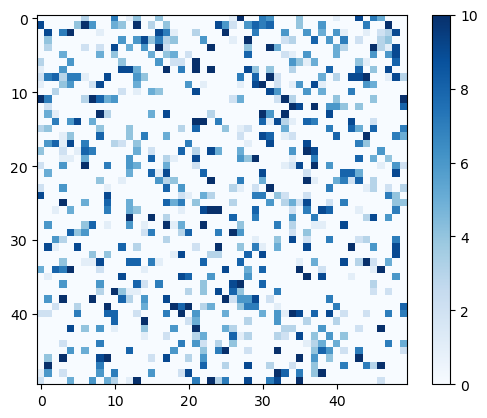

In [105]:
plt.imshow(adjacency_matrix,cmap='Blues')
plt.colorbar()

In [29]:
# list all the edges of the node 1
print("Edges of node 1:")
for edge in G.edges(1, data=True):
    print(edge)

Edges of node 1:
(1, 2, {'weight': 10.0})
(1, 4, {'weight': 3.0})
(1, 8, {'weight': 5.0})
(1, 11, {'weight': 2.0})
(1, 13, {'weight': 2.0})
(1, 15, {'weight': 2.0})
(1, 19, {'weight': 8.0})
(1, 26, {'weight': 10.0})
(1, 29, {'weight': 3.0})
(1, 31, {'weight': 4.0})
(1, 35, {'weight': 2.0})
(1, 36, {'weight': 3.0})
(1, 39, {'weight': 10.0})
(1, 41, {'weight': 6.0})
(1, 45, {'weight': 1.0})
(1, 47, {'weight': 10.0})
(1, 48, {'weight': 7.0})


{(0, 1): Text(0.019306834670449302, 0.20342951182929545, '3.0'),
 (0, 2): Text(-0.4421715693676147, 0.22524455238907426, '2.0'),
 (0, 6): Text(-0.49404134997108373, -0.252455626409673, '9.0'),
 (0, 10): Text(-0.2905625133904003, 0.04171335997480177, '5.0'),
 (0, 11): Text(-0.6817662880657788, 0.46564501834915695, '4.0'),
 (0, 12): Text(0.1481804859936364, 0.4314291509279022, '7.0'),
 (0, 15): Text(-0.14982180769943942, 0.18995392090752422, '4.0'),
 (0, 16): Text(-0.4045656862722455, -0.00416559600657046, '8.0'),
 (1, 0): Text(0.019306834670449302, 0.20342951182929545, '8.0'),
 (1, 3): Text(0.5101557484063137, 0.42578208262554207, '8.0'),
 (1, 8): Text(0.13388682685022602, -0.008309017498863813, '2.0'),
 (1, 12): Text(0.609619158092026, 0.14826771840534067, '2.0'),
 (1, 14): Text(0.33973107138938885, 0.06480800001210907, '3.0'),
 (1, 15): Text(0.3116168643989502, -0.09320751161503729, '8.0'),
 (2, 3): Text(0.04867734436824972, 0.4475971231853209, '6.0'),
 (2, 8): Text(-0.327591577187838

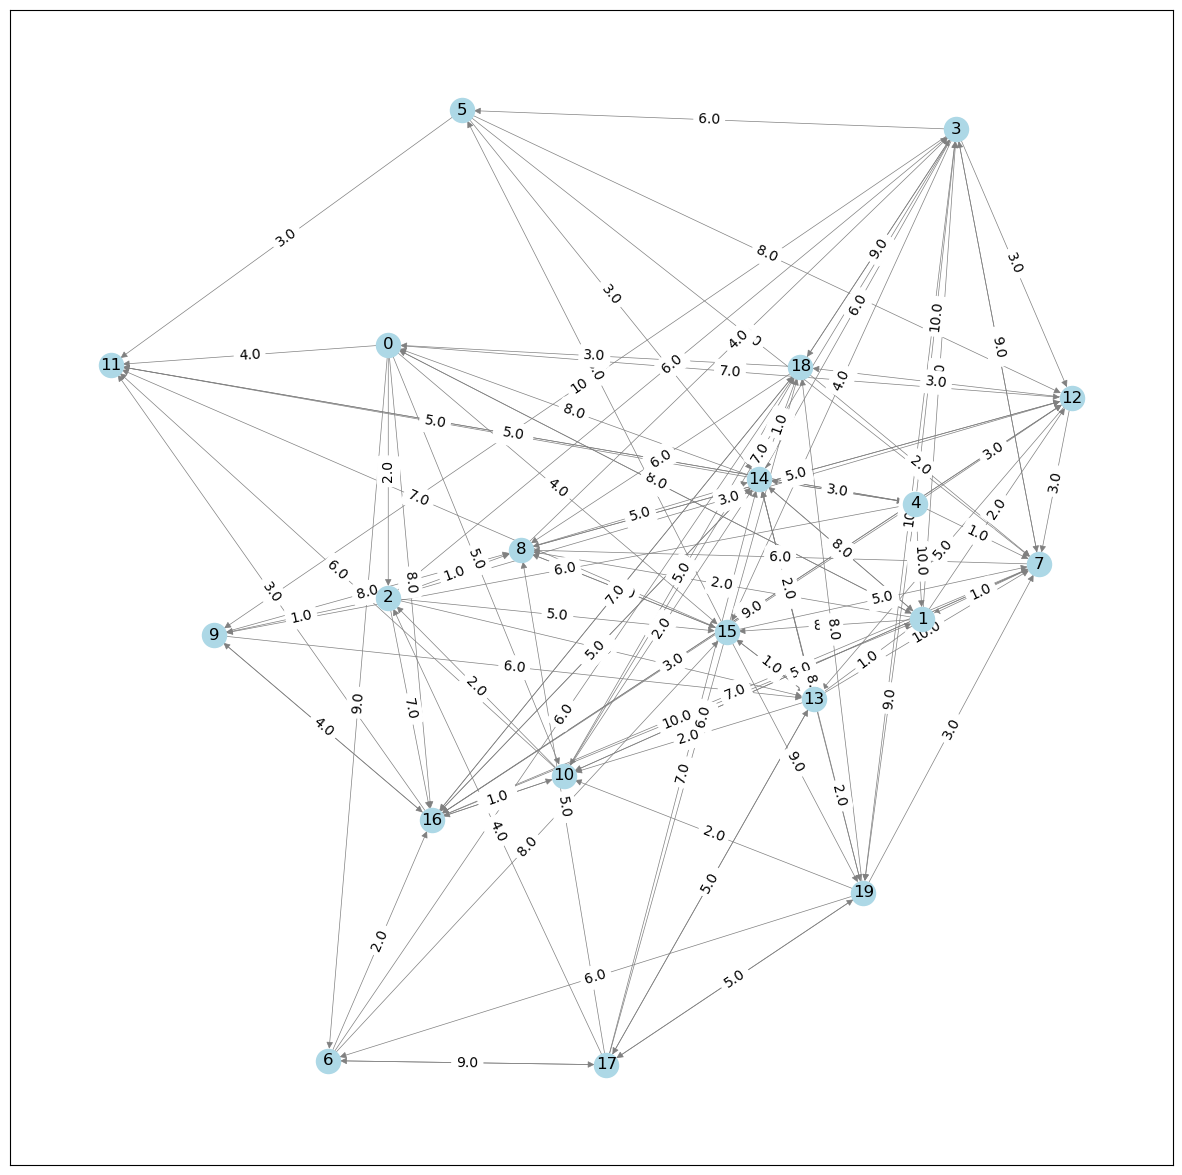

In [92]:
pos = nx.kamada_kawai_layout(G)
# set figure size
plt.figure(figsize=(15,15))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=0.5, alpha=1)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [30]:
def floyd_warshall(graph):
    num_nodes = len(graph.nodes)
    dist = [[float("inf")] * num_nodes for _ in range(num_nodes)]
    next_node = [[0] * num_nodes for _ in range(num_nodes)]
    
    # Initialize distance and next_node matrices
    for edge in graph.edges(data=True):
        u, v, weight = edge
        dist[u][v] = weight["weight"]
        next_node[u][v] = v
    for i in range(num_nodes):
        dist[i][i] = 0

    # Floyd-Warshall
    for k in trange(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_node[i][j] = next_node[i][k]

    # Build path reconstruction function
    def reconstruct_path(start, end):
        if next_node[start][end] == 0:
            return []
        
        path = [start]
        while start != end:
            start = next_node[start][end]
            path.append(start)

        return path

    return dist, reconstruct_path


In [114]:
# Testing with the previous graph
distances, get_path = floyd_warshall(G)

  0%|          | 0/50 [00:00<?, ?it/s]

In [113]:
# Example: shortest path from node 3 to node 1
print("Shortest path from node 6 to node 4: ", get_path(6, 4))
path = get_path(6, 4)
total_reward = 0
for i in range(len(path) - 1):
    total_reward += -G.edges[path[i], path[i + 1]]['weight']
print("Total reward: ", total_reward)

Shortest path from node 6 to node 4:  [6, 19, 4]
Total reward:  -3.0


## MC-TD

In [106]:
import numpy as np

def mc_policy_evaluation(graph, episodes, start_node, end_node, gamma=1):
    Q = {}
    returns = {}

    for edge in graph.edges():
        Q[edge] = 0
        returns[edge] = []

    for episode in range(episodes):
        state = start_node
        trajectory = []
        while state != end_node:
            actions = list(graph[state])
            if not actions:  # If there are no actions, break out of the loop
                break
            action = np.random.choice(actions)
            reward = -graph[state][action]['weight']
            trajectory.append((state, action, reward))
            state = action

        G = 0
        for t in reversed(range(len(trajectory))):
            state, action, reward = trajectory[t]
            G = gamma * G + reward
            if not (state, action) in [(x[0], x[1]) for x in trajectory[0:t]]:
                returns[(state, action)].append(G)
                Q[(state, action)] = np.mean(returns[(state, action)])

    policy = {}
    for state in graph.nodes():
        actions = list(graph[state])
        if actions:
            q_values = [Q[(state, action)] for action in actions]
            best_action = actions[np.argmax(q_values)]
            policy[state] = best_action

    return policy


# Use the function
policy = mc_policy_evaluation(G, 1000, 0, 4)

print("Optimal Policy:")
for node in policy:
    print(f"From node {node}, go to node {policy[node]}")


Optimal Policy:
From node 0, go to node 6
From node 1, go to node 6
From node 2, go to node 4
From node 3, go to node 16
From node 4, go to node 1
From node 5, go to node 34
From node 6, go to node 4
From node 7, go to node 21
From node 8, go to node 4
From node 9, go to node 4
From node 10, go to node 13
From node 11, go to node 6
From node 12, go to node 49
From node 13, go to node 2
From node 14, go to node 4
From node 15, go to node 49
From node 16, go to node 4
From node 17, go to node 4
From node 18, go to node 3
From node 19, go to node 4
From node 20, go to node 39
From node 21, go to node 16
From node 22, go to node 16
From node 23, go to node 26
From node 24, go to node 29
From node 25, go to node 33
From node 26, go to node 4
From node 27, go to node 15
From node 28, go to node 9
From node 29, go to node 4
From node 30, go to node 44
From node 31, go to node 42
From node 32, go to node 7
From node 33, go to node 43
From node 34, go to node 4
From node 35, go to node 11
From 

### The code should still work without re-do dynamic programming when changing the starting node andtarget node.

In [12]:
def mc_policy_evaluation(graph, episodes, gamma=1):
    Q = {}
    returns = {}

    for edge in graph.edges():
        Q[edge] = 0
        returns[edge] = []

    for episode in trange(episodes):
        for start_node in graph.nodes():
            state = start_node
            trajectory = []
            while True:  # No end_node, we'll break the loop manually.
                actions = list(graph[state])
                if not actions:  # If there are no actions, break out of the loop
                    break
                action = np.random.choice(actions)
                reward = -graph[state][action]['weight']
                trajectory.append((state, action, reward))
                state = action

                if len(trajectory) > 1 and state == start_node:  # We've made a full loop.
                    break

            G = 0
            for t in reversed(range(len(trajectory))):
                state, action, reward = trajectory[t]
                G = gamma * G + reward
                if not (state, action) in [(x[0], x[1]) for x in trajectory[0:t]]:
                    returns[(state, action)].append(G)
                    Q[(state, action)] = np.mean(returns[(state, action)])

    policy = {}
    for state in graph.nodes():
        actions = list(graph[state])
        if actions:
            q_values = [Q[(state, action)] for action in actions]
            best_action = actions[np.argmax(q_values)]
            policy[state] = best_action

    return policy

# Use the function
policy = mc_policy_evaluation(G, 500)

print("Optimal Policy:")
for node in policy:
    print(f"From node {node}, go to node {policy[node]}")


  0%|          | 0/500 [00:00<?, ?it/s]

Optimal Policy:
From node 0, go to node 4
From node 1, go to node 8
From node 2, go to node 8
From node 3, go to node 2
From node 4, go to node 7
From node 5, go to node 8
From node 6, go to node 3
From node 7, go to node 1
From node 8, go to node 5
From node 9, go to node 4


# SARSA 0

In [116]:
class RLAgent:
    def __init__(self, graph, num_nodes, alpha=0.5, gamma=0.95, epsilon=0.1):
        self.graph = graph
        self.num_nodes = num_nodes
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_values = np.zeros((num_nodes, num_nodes))  # Q-values initialization
        self.e_values = np.zeros((num_nodes, num_nodes))  # E-values initialization

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.q_values[state, action] for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            # Choose a random action from the neighbors
            action = np.random.choice(neighbors)
        else:
            # Choose the action with highest Q-value from the neighbors
            action = neighbors[np.argmax(q_values)]
        return action

    def update(self, state, action, reward, next_state, next_action):
        # SARSA(0) update
        target = reward + self.gamma * self.q_values[next_state, next_action]
        self.q_values[state, action] += self.alpha * (target - self.q_values[state, action])

    # def learn(self, start_node, end_node, num_episodes):
    #     for i in range(num_episodes):
    #         # print(f"Episode {i}")
    #         state = start_node
    #         action = self.choose_action(state)
    #         while state != end_node:
    #             reward = -self.graph.edges[state, action]['weight']
    #             next_state = action
    #             next_action = self.choose_action(next_state)
    #             self.update(state, action, reward, next_state, next_action)
    #             state = next_state
    #             action = next_action

    def learn(self, num_episodes):
        for start_node in range(self.num_nodes):
            for end_node in range(self.num_nodes):
                if start_node == end_node:
                    continue
                for _ in range(num_episodes):
                    state = start_node
                    action = self.choose_action(state)
                    while state != end_node:
                        reward = -self.graph.edges[state, action]['weight']
                        next_state = action
                        next_action = self.choose_action(next_state)
                        self.update(state, action, reward, next_state, next_action)
                        state = next_state
                        action = next_action

    # def get_optimal_path(self, start_node, end_node):
    #     path = [start_node]
    #     state = start_node
    #     while state != end_node:
    #         neighbors = list(self.graph.neighbors(state))
    #         q_values = [self.q_values[state, action] for action in neighbors]
    #         action = neighbors[np.argmax(q_values)]
    #         state = action
    #         path.append(state)
    #     return path
    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        visited = set([start_node])
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            # Filter out already visited nodes
            neighbors = [node for node in neighbors if node not in visited]
            q_values = [self.q_values[state, action] for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            visited.add(action)
            state = action
            path.append(state)
        return path

# Initialize the RLAgent
agent = RLAgent(G, num_nodes)

# Learn from the environment
# agent.learn(start_node=6, end_node=4, num_episodes=10000)
agent.learn(num_episodes=200)




In [ ]:
# Get the optimal path
path = agent.get_optimal_path(start_node=6, end_node=4)
print("Optimal path from node 6 to node 4: ", path)

## SARSA LAMBDA

In [110]:
class RLAgent_lambda:
    def __init__(self, graph, num_nodes, alpha=0.5, gamma=0.95, epsilon=0.1, lambda_=0.9):
        self.graph = graph
        self.num_nodes = num_nodes
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.q_values = np.zeros((num_nodes, num_nodes))  # Q-values initialization
        self.e_values = np.zeros((num_nodes, num_nodes))  # Eligibility traces initialization

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.q_values[state, action] for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            # Choose a random action from the neighbors
            action = np.random.choice(neighbors)
        else:
            # Choose the action with highest Q-value from the neighbors
            action = neighbors[np.argmax(q_values)]
        return action

    def update(self, state, action, reward, next_state, next_action):
        # SARSA(lambda) update
        delta = reward + self.gamma * self.q_values[next_state, next_action] - self.q_values[state, action]
        self.e_values[state, action] += 1
        self.q_values += self.alpha * delta * self.e_values
        self.e_values *= self.gamma * self.lambda_

    def learn(self, start_node, end_node, num_episodes):
        for _ in range(num_episodes):
            state = start_node
            action = self.choose_action(state)
            self.e_values.fill(0)  # Reset the eligibility traces
            while state != end_node:
                reward = -self.graph.edges[state, action]['weight']
                next_state = action
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        visited = set([start_node])
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            # Filter out already visited nodes
            neighbors = [node for node in neighbors if node not in visited]
            q_values = [self.q_values[state, action] for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            visited.add(action)
            state = action
            path.append(state)
        return path


In [ ]:
# Initialize the RLAgent
agent_lambda = RLAgent_lambda(G, num_nodes)

# Learn from the environment
# agent.learn(start_node=6, end_node=4, num_episodes=10000)
agent_lambda.learn(start_node=6, end_node=4, num_episodes=100000)

path = agent_lambda.get_optimal_path(start_node=6, end_node=4)
print("Optimal path from node 6 to node 4: ", path)

## Q learning

In [109]:
class QLearningAgent:
    def __init__(self, graph, num_nodes, alpha=0.5, gamma=0.9, epsilon=0.3):
        self.graph = graph
        self.num_nodes = num_nodes
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_values = np.zeros((num_nodes, num_nodes))  # Q-values initialization

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.q_values[state, action] for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            # Choose a random action from the neighbors
            action = np.random.choice(neighbors)
        else:
            # Choose the action with highest Q-value from the neighbors
            action = neighbors[np.argmax(q_values)]
        return action

    # def update(self, state, action, reward, next_state):
    #     # Q-learning update
    #     neighbors = list(self.graph.neighbors(next_state))
    #     next_q_values = [self.q_values[next_state, next_action] for next_action in neighbors]
    #     max_next_q_value = max(next_q_values) if neighbors else 0
    #     delta = reward + self.gamma * max_next_q_value - self.q_values[state, action]
    #     self.q_values[state, action] += self.alpha * delta

    def update(self, state, action, reward, next_state):
        # Q-learning update
        neighbors = list(self.graph.neighbors(next_state))
        next_q_values = [self.q_values[next_state, next_action] for next_action in neighbors]
        max_next_q_value = max(next_q_values) if neighbors else 0
        # apply epsilon-greedy
        if np.random.uniform(0, 1) < self.epsilon:
            # Choose a random action from the neighbors
            next_action = np.random.choice(neighbors)
            max_next_q_value = self.q_values[next_state, next_action]
        delta = reward + self.gamma * max_next_q_value - self.q_values[state, action]
        self.q_values[state, action] += self.alpha * delta

    def learn(self, num_episodes):
        for _ in trange(num_episodes):
            # rand start and end node
            start_node = np.random.randint(0, self.num_nodes)
            end_node = np.random.randint(0, self.num_nodes)
            # start_node = 6
            # end_node = 4
            # visited = set()
            # visited = set([start_node])
            state = start_node
            while state != end_node:
                # neighbors = list(self.graph.neighbors(state))
                # Filter out already visited nodes
                # neighbors = [node for node in neighbors if node not in visited]
                # if len(neighbors) == 0:
                #     break
                action = self.choose_action(state)
                # visited.add(action)
                reward = -self.graph.edges[state, action]['weight']
                next_state = action
                self.update(state, action, reward, next_state)
                state = next_state
            

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        visited = set([start_node])
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            # Filter out already visited nodes
            neighbors = [node for node in neighbors if node not in visited]
            if len(neighbors) == 0:
                # return to previous node and select another action
                visited.add(state)
                path.pop()
                state = path[-1]
                neighbors = list(self.graph.neighbors(state))
                neighbors = [node for node in neighbors if node not in visited]
                continue
            q_values = [self.q_values[state, action] for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            visited.add(action)
            state = action
            path.append(state)
        return path

在使用强化学习解决这类最短路径问题时，通常我们不需要特别防止agent重复进入同一个节点。在学习初期，让 agent 有机会探索环路（即多次访问同一个节点）是有益的，因为它可以帮助 agent 更全面地了解环境。随着学习的进行，如果某条路径经常导致低奖励（例如因为多次绕圈导致路径过长），agent 将通过学习减少选择这类路径。

然而，如果你发现agent在训练中经常陷入“绕圈”的行为，或者你的环境有特别的需求（例如，一些环境中多次访问同一个节点可能导致严重的负面效果），那么可能需要设定特别的规则来防止这种情况。例如，你可以修改奖励函数，当 agent 试图访问一个已经访问过的节点时，给予其一个大的负奖励。或者，你也可以直接在决策函数中排除已经访问过的节点，不让 agent 再次访问。

需要注意的是，这些额外的规则可能会增加问题的复杂性，并可能需要更多的时间和精力来调试和优化。在实施这些规则之前，你可能需要先评估一下它们是否真的有必要，以及它们可能带来的益处是否超过了额外的开销。

In [110]:
# Initialize the RLAgent
agent = QLearningAgent(G, num_nodes)

# Learn from the environment
agent.learn(num_episodes=50000)

# path = agent.get_optimal_path(start_node=6, end_node=4)
# print("Optimal path from node 6 to node 4: ", path)

  0%|          | 0/50000 [00:00<?, ?it/s]

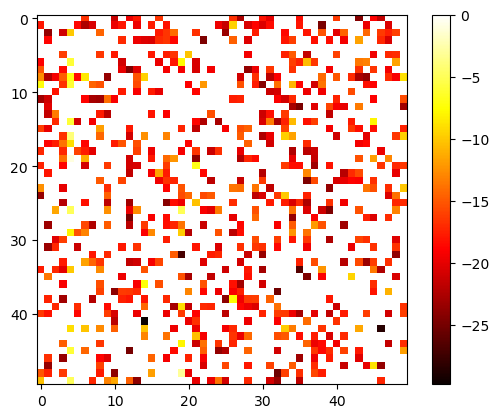

In [111]:
plt.imshow(agent.q_values, cmap='hot')
plt.colorbar()

In [112]:
path = agent.get_optimal_path(start_node=6, end_node=4)
print("Optimal path from node 6 to node 4: ", path)
# calculate the total reward
total_reward = 0
for i in range(len(path) - 1):
    total_reward += -G.edges[path[i], path[i + 1]]['weight']
print("Total reward: ", total_reward)

Optimal path from node 6 to node 4:  [6, 4]
Total reward:  -6.0


## Value Func appox

In [71]:
class RLAgent_vfa:
    def __init__(self, graph, num_nodes, alpha=0.5, gamma=0.95, epsilon=0.1, lambda_=0.9):
        self.graph = graph
        self.num_nodes = num_nodes
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.w = np.zeros(num_nodes * num_nodes)  # Weight vector for function approximation
        self.e_values = np.zeros(num_nodes * num_nodes)  # Eligibility traces initialization

    def get_features(self, state, action):
        features = np.zeros(self.num_nodes * self.num_nodes)
        features[state*self.num_nodes + action] = 1
        return features

    def get_q_value(self, state, action):
        features = self.get_features(state, action)
        return np.dot(self.w, features)

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.get_q_value(state, action) for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            # Choose a random action from the neighbors
            action = np.random.choice(neighbors)
        else:
            # Choose the action with highest Q-value from the neighbors
            action = neighbors[np.argmax(q_values)]
        return action

    def update(self, state, action, reward, next_state, next_action):
        # SARSA(λ) update with function approximation
        delta = reward + self.gamma * self.get_q_value(next_state, next_action) - self.get_q_value(state, action)
        features = self.get_features(state, action)
        self.e_values += features
        self.w += self.alpha * delta * self.e_values
        self.e_values *= self.gamma * self.lambda_

    def learn(self, num_episodes):
        start_node = np.random.randint(0, self.num_nodes)
        end_node = np.random.randint(0, self.num_nodes)
        for _ in trange(num_episodes):
            state = start_node
            action = self.choose_action(state)
            self.e_values.fill(0)  # Reset the eligibility traces
            while state != end_node:
                reward = -self.graph.edges[state, action]['weight']
                next_state = action
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        visited = set([start_node])
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            # Filter out already visited nodes
            neighbors = [node for node in neighbors if node not in visited]
            q_values = [self.get_q_value(state, action).item() for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            visited.add(action)
            state = action
            path.append(state)
        return path


In [75]:
# Initialize the RLAgent
agent_vfa = RLAgent_vfa(G, num_nodes)

# Learn from the environment
# agent.learn(start_node=6, end_node=4, num_episodes=10000)
agent_vfa.learn(num_episodes=100000)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [76]:
path = agent_vfa.get_optimal_path(start_node=6, end_node=4)
print("Optimal path from node 6 to node 4: ", path)

Optimal path from node 6 to node 4:  [6, 9, 10, 47, 1, 20, 13, 34, 17, 49, 40, 5, 32, 45, 39, 38, 14, 8, 42, 25, 12, 31, 26, 4]


## VFA torch

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim

class QNet(nn.Module):
    def __init__(self, num_nodes):
        super(QNet, self).__init__()
        self.fc1 = nn.Linear(num_nodes*2, 64)  # Assume the input is a one-hot encoded state-action pair
        self.fc2 = nn.Linear(64, 1)  # The output is a single Q-value

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class RLAgent_vfa_torch:
    def __init__(self, graph, num_nodes, alpha=0.01, gamma=0.95, epsilon=0.1, lambda_=0.9):
        self.graph = graph
        self.num_nodes = num_nodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.net = QNet(num_nodes)
        self.optimizer = optim.SGD(self.net.parameters(), lr=alpha)
        self.e_values = np.zeros((num_nodes, num_nodes))

    def get_features(self, state, action):
        features = np.zeros(self.num_nodes * 2)
        features[state] = 1
        features[self.num_nodes + action] = 1
        return torch.FloatTensor(features)

    def get_q_value(self, state, action):
        features = self.get_features(state, action)
        return self.net(features)

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.get_q_value(state, action).item() for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(neighbors)
        else:
            action = neighbors[np.argmax(q_values)]
        return action

    def update(self, state, action, reward, next_state, next_action):
        q_value = self.get_q_value(state, action)
        next_q_value = self.get_q_value(next_state, next_action)
        target = reward + self.gamma * next_q_value

        self.optimizer.zero_grad()
        loss = nn.MSELoss()(q_value, target.detach())
        loss.backward()
        self.optimizer.step()

    def learn(self, num_episodes):
        start_node = np.random.randint(0, self.num_nodes)
        end_node = np.random.randint(0, self.num_nodes)
        for _ in trange(num_episodes):
            state = start_node
            action = self.choose_action(state)
            while state != end_node:
                reward = -self.graph.edges[state, action]['weight']
                next_state = action
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            q_values = [self.get_q_value(state, action).item() for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            state = action
            path.append(state)
        return path


In [68]:
# Initialize the RLAgent
agent_vfa_torch = RLAgent_vfa_torch(G, num_nodes)

# Learn from the environment
# agent.learn(start_node=6, end_node=4, num_episodes=50000)
agent_vfa_torch.learn(num_episodes=50000)


NameError: name 'RLAgent_vfa_torch' is not defined

In [75]:
path = agent_vfa_torch.get_optimal_path(start_node=6, end_node=4)
print("Optimal path from node 6 to node 4: ", path)

Optimal path from node 6 to node 4:  [6, 3, 0, 4]


### with gpu

In [95]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class QNet(nn.Module):
    def __init__(self, num_nodes):
        super(QNet, self).__init__()
        self.fc1 = nn.Linear(num_nodes*2, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class RLAgent_vfa_torch:
    def __init__(self, graph, num_nodes, alpha=0.01, gamma=0.95, epsilon=0.1, lambda_=0.9):
        self.graph = graph
        self.num_nodes = num_nodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.net = QNet(num_nodes).to(device)
        self.optimizer = optim.SGD(self.net.parameters(), lr=alpha)

    def get_features(self, state, action):
        features = np.zeros(self.num_nodes * 2)
        features[state] = 1
        features[self.num_nodes + action] = 1
        return torch.FloatTensor(features).to(device)

    def get_q_value(self, state, action):
        features = self.get_features(state, action)
        return self.net(features)

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.get_q_value(state, action).item() for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(neighbors)
        else:
            action = neighbors[np.argmax(q_values)]
        return action

    def update(self, state, action, reward, next_state, next_action):
        q_value = self.get_q_value(state, action)
        next_q_value = self.get_q_value(next_state, next_action)
        target = reward + self.gamma * next_q_value
        self.optimizer.zero_grad()
        loss = nn.MSELoss()(q_value, target.detach())
        loss.backward()
        self.optimizer.step()

    def learn(self, num_episodes):
        for _ in trange(num_episodes):
            start_node = np.random.randint(0, self.num_nodes)
            end_node = np.random.randint(0, self.num_nodes)
            # start_node = 6
            # end_node = 4
            state = start_node
            action = self.choose_action(state)
            while state != end_node:
                reward = -self.graph.edges[state, action]['weight']
                next_state = action
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        visited = set([start_node])
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            # Filter out already visited nodes
            neighbors = [node for node in neighbors if node not in visited]
            q_values = [self.get_q_value(state, action).item() for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            print(state, action)
            visited.add(action)
            state = action
            path.append(state)
        return path


In [96]:
num_episodes = 100

agent = RLAgent_vfa_torch(G, num_nodes)
agent.learn(num_episodes=num_episodes)

  0%|          | 0/100 [00:00<?, ?it/s]

In [97]:
path = agent.get_optimal_path(start_node=6, end_node=4)
print(path)

6 49
49 21
21 0
0 3
3 12
12 26
26 11
11 28
28 43
43 48
48 36
36 40
40 37
37 33
33 35
35 46
46 5
5 27
27 24
24 42
42 34
34 18
18 23
23 14
14 47
47 1
1 20
20 7
7 10
10 31
31 25
25 44
44 29
29 17
17 45
45 39
39 30
30 4
[6, 49, 21, 0, 3, 12, 26, 11, 28, 43, 48, 36, 40, 37, 33, 35, 46, 5, 27, 24, 42, 34, 18, 23, 14, 47, 1, 20, 7, 10, 31, 25, 44, 29, 17, 45, 39, 30, 4]


## W expereince replay

In [88]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"

class QNet(nn.Module):
    def __init__(self, num_nodes):
        super(QNet, self).__init__()
        self.fc1 = nn.Linear(num_nodes*2, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.position = 0

    def push(self, state, action, reward, next_state, next_action):
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)
        self.buffer[self.position] = (state, action, reward, next_state, next_action)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)

class RLAgent_vfa_torch_buffered:
    def __init__(self, graph, num_nodes, alpha=0.01, gamma=0.95, epsilon=0.1, lambda_=0.9, buffer_size=1000):
        self.graph = graph
        self.num_nodes = num_nodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.net = QNet(num_nodes).to(device)
        self.target_net = QNet(num_nodes).to(device)
        self.target_net.load_state_dict(self.net.state_dict())
        self.target_net.eval()
        self.optimizer = optim.Adam(self.net.parameters(), lr=alpha)
        self.buffer = ReplayBuffer(buffer_size)

    def get_features(self, state, action):
        features = np.zeros(self.num_nodes * 2)
        features[state] = 1
        features[self.num_nodes + action] = 1
        return torch.FloatTensor(features).to(device)

    def get_q_value(self, state, action):
        features = self.get_features(state, action)
        return self.net(features)

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.get_q_value(state, action).item() for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(neighbors)
        else:
            action = neighbors[np.argmax(q_values)]
        return action
    
    def update(self, state, action, reward, next_state, next_action):
        q_value = self.get_q_value(state, action)
        next_q_value = self.target_net(self.get_features(next_state, next_action))
        target = reward + self.gamma * next_q_value

        self.optimizer.zero_grad()
        loss = nn.MSELoss()(q_value, target.detach())
        loss.backward()
        self.optimizer.step()

    def learn(self, num_episodes, batch_size=16, update_interval=10):
        for episode in trange(num_episodes):
            start_node = np.random.randint(0, self.num_nodes)
            end_node = np.random.randint(0, self.num_nodes)
            # start_node = 6
            # end_node = 4 
            state = start_node
            action = self.choose_action(state)
            while state != end_node:
                reward = -self.graph.edges[state, action]['weight']
                next_state = action
                next_action = self.choose_action(next_state)
                self.buffer.push(state, action, reward, next_state, next_action)
                if len(self.buffer) > batch_size:
                    experiences = self.buffer.sample(batch_size)
                    for state, action, reward, next_state, next_action in experiences:
                        self.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            if episode % update_interval == 0:
                self.target_net.load_state_dict(self.net.state_dict())

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        visited = set([start_node])
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            # Filter out already visited nodes
            neighbors = [node for node in neighbors if node not in visited]
            q_values = [self.get_q_value(state, action).item() for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            visited.add(action)
            print(state, action)
            state = action
            path.append(state)
        return path



In [93]:
num_episodes = 200
agent = RLAgent_vfa_torch_buffered(G, num_nodes)
agent.learn(num_episodes=num_episodes)

  0%|          | 0/200 [00:00<?, ?it/s]

In [94]:
path = agent.get_optimal_path(start_node=6, end_node=4)
print(path)
# calculate reward
def calculate_reward(path):
    reward = 0
    for i in range(len(path) - 1):
        reward -= G.edges[path[i], path[i + 1]]['weight']
    return reward
print(calculate_reward(path))

6 49
49 40
40 37
37 7
7 48
48 18
18 35
35 46
46 43
43 22
22 17
17 9
9 26
26 4
[6, 49, 40, 37, 7, 48, 18, 35, 46, 43, 22, 17, 9, 26, 4]
-37.0
